In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ATP Dataset_2012-01 to 2017-07_Int_V4.csv')
match_df = pd.DataFrame(df)
match_df.head(5)

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092


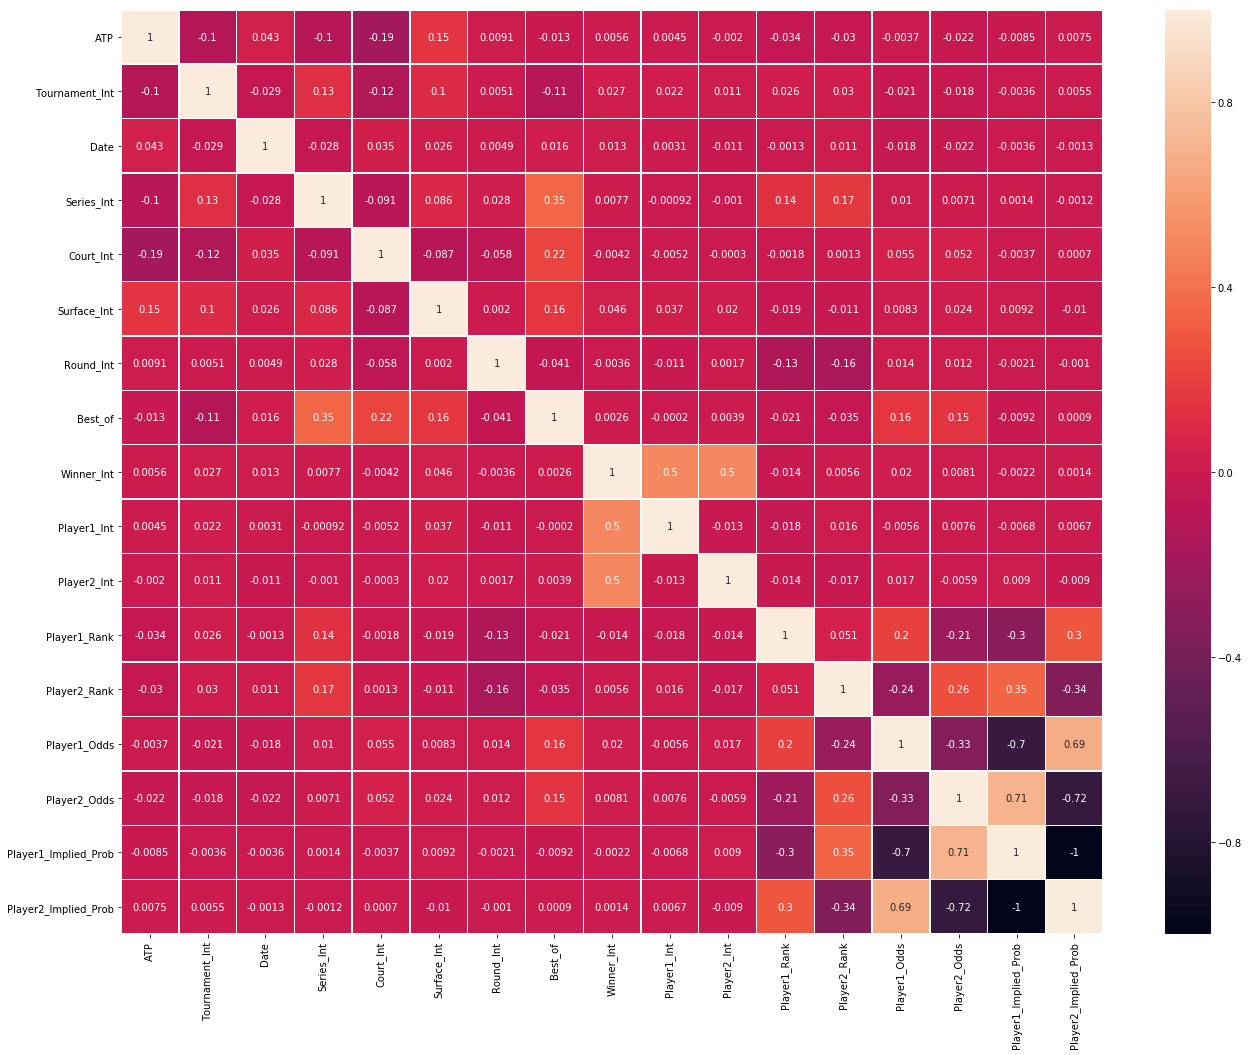

In [2]:
plt.subplots(figsize=(22,17))
sns.heatmap(df.corr(),linewidths=.4,annot=True)

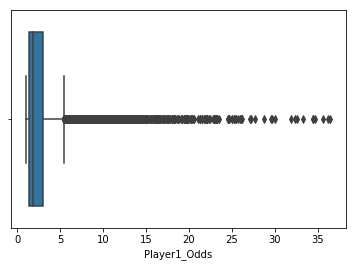

In [3]:
sns.boxplot(x=df['Player1_Odds'])

In [6]:
v=sorted(df['Player1_Odds'])
q1, q3= np.percentile(v,[25,75])
print(q1)
q3


1.38


2.99

In [7]:
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print(lower_bound)
print(upper_bound)

-1.0350000000000006
5.405000000000001


In [8]:
list_ol = [] 
for i in range(len(df['Player2_Odds'])):
    if (df['Player2_Odds'][i] > lower_bound and df['Player2_Odds'][i]<upper_bound):
        list_ol.append(df['Player2_Odds'][i])
    else:
        list_ol.append(0)
        

In [9]:
df['Player1_Ods'] = pd.Series(list_ol)
df.head(5)

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Player1_Ods
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,1.29
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,2.43
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,2.01
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,3.01
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,1.41


In [10]:
for i in range(len(df['Player1_Ods'])):
    if(df['Player1_Ods'][i] == 0):
        df.drop(i)
df.head()

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,Player1_Ods
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,1.29
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,2.43
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,2.01
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,3.01
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,1.41


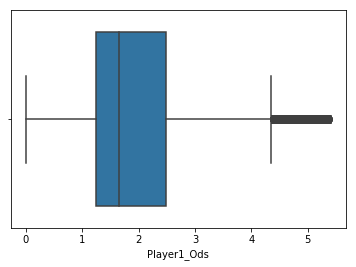

In [11]:
sns.boxplot(x=df['Player1_Ods'])